In [2]:
# import data and dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pprint import pprint


In [3]:
# clean up data 
age_nativity = pd.read_csv("data/age_by_nativity.csv")
employment_by_industry = pd.read_csv("data/employment_by_industries.csv")
property_value = pd.read_csv("data/property_value.csv")
demographics = pd.read_csv("data/tdc_download_tool.csv")
wage_by_gender = pd.read_csv("data/wage_by_gender_in_common_jobs.csv")
wage_by_race = pd.read_csv("data/wage_by_race_and_ethnicity_in_common_jobs.csv")
wage_distribution = pd.read_csv("data/wage_distribution.csv")

In [4]:
wage_by_gender.head()
wage_by_gender[['Gender',
               'Year',
               'Detailed Occupation',
               'Average Wage',
                'Average Wage Appx MOE',
               'Total Population',
               'Total Population MOE Appx',
               ]]


,Gender,Year,Detailed Occupation,Average Wage,Average Wage Appx MOE,Total Population,Total Population MOE Appx
0,Male,2017,Retail salespersons,47846.352518,3804.663122,105135,7920.181697
1,Female,2017,Retail salespersons,30004.730677,2799.423796,67718,6368.011331
2,Female,2017,Driver/sales workers & truck drivers,35748.793893,4667.189878,16768,3176.610042
3,Female,2017,Miscellaneous managers,76689.726074,4527.145064,110373,8113.010681
4,Female,2017,Elementary & middle school teachers,47260.808781,923.589424,260916,12381.986848
5,Male,2017,Cashiers,24058.879861,2577.446577,36899,4707.689772
6,Male,2017,Driver/sales workers & truck drivers,48943.784925,2126.767557,268483,12555.549846
7,Male,2017,Miscellaneous managers,114332.822954,5423.644982,223755,11487.441586
8,Male,2017,Elementary & middle school teachers,51282.940922,2241.271288,71194,6528.300965
9,Female,2017,Cashiers,20901.750238,1447.688228,95523,7552.987237


## Avg Wage Over Time Male vs. Female

In [5]:
#Avg wage male
male = wage_by_gender[(wage_by_gender['Gender']=='Male')]
wage_avg_male = pd.DataFrame(male.groupby('Year')['Average Wage'].mean())

#Avg wage female
female = wage_by_gender[(wage_by_gender['Gender']=='Female')]
wage_avg_female = pd.DataFrame(female.groupby('Year')['Average Wage'].mean())


In [6]:
#Create Dataframe with wages for male and female and the difference
wages_df = pd.merge(wage_avg_male, wage_avg_female, how="left", on=["Year"])
avg_wages = wages_df.rename(columns={'Average Wage_x': 'Avg Wage Male',
                                     'Average Wage_y': 'Avg Wage Female'})
avg_wages['Avg Wage Difference'] = avg_wages['Avg Wage Male'] - avg_wages['Avg Wage Female']
avg_wages['Percent Difference'] = (avg_wages['Avg Wage Female'] - avg_wages['Avg Wage Male'])/avg_wages['Avg Wage Male']
# avg_wages.reset_index(level=0, inplace=True)



In [9]:
avg_wages.style.format({'Avg Wage Male': '${:,.2f}'.format,
                       'Avg Wage Female': '${:,.2f}'.format,
                       'Avg Wage Difference': '${:,.2f}'.format,
                       'Percent Difference': '{:,.2%}'.format})

,Avg Wage Male,Avg Wage Female,Avg Wage Difference,Percent Difference
Year,,,,
2014,"$54,033.66","$40,420.49","$13,613.17",-25.19%
2015,"$56,106.25","$41,170.07","$14,936.18",-26.62%
2016,"$57,480.99","$43,416.67","$14,064.32",-24.47%
2017,"$57,292.96","$42,121.16","$15,171.79",-26.48%


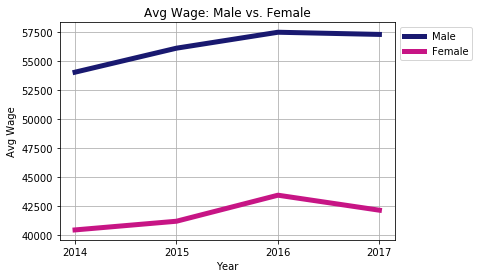

In [13]:
#Plot avg wages 
plt.plot(avg_wages['Avg Wage Male'], color='midnightblue', alpha=1, linewidth=5, label="Male")
plt.plot(avg_wages['Avg Wage Female'], color='mediumvioletred', alpha=1, linewidth=5, label='Female')
plt.legend(bbox_to_anchor=(1,1))
plt.title("Avg Wage: Male vs. Female")
plt.xlabel('Year')
plt.ylabel('Avg Wage')
plt.xticks(np.linspace(2014, 2017, 4, endpoint=True)) 
plt.grid()
plt.show()


## Population Per Occupation Over Time: Female 

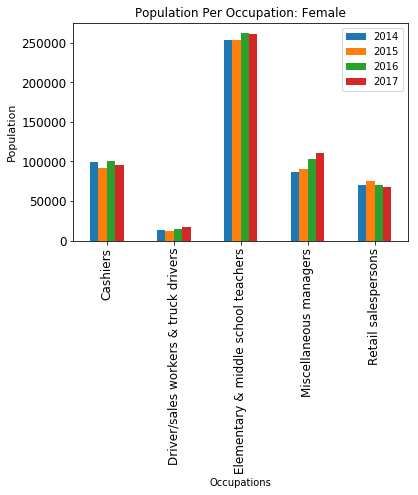

In [117]:
female_graph = female[['Total Population','Year','Detailed Occupation']]
female_grp = female_graph.groupby(by=['Detailed Occupation','Year']).sum().unstack()
female_grp.plot(kind="bar", title="Population Per Occupation: Female", fontsize=12)
plt.ylabel('Population', fontsize=11)
plt.xlabel('Occupations')
plt.legend(['2014', '2015', '2016', '2017'])

## Population Per Occupation Over Time: Male

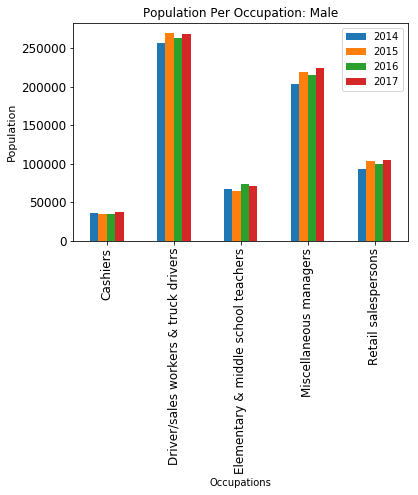

In [114]:
male_graph = male[['Total Population','Year','Detailed Occupation']]
male_grp = male_graph.groupby(by=['Detailed Occupation','Year']).sum().unstack()
male_grp.plot(kind="bar", title="Population Per Occupation: Male", fontsize=12)
plt.ylabel('Population', fontsize=11)
plt.xlabel('Occupations')
plt.legend(['2014', '2015', '2016', '2017'])

## Avg Wage Over Time: Female

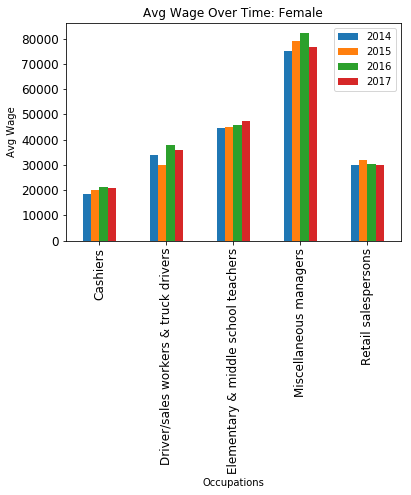

In [116]:
female_graph = female[['Average Wage','Year','Detailed Occupation']]
female_grp = female_graph.groupby(by=['Detailed Occupation','Year']).sum().unstack()
female_grp.plot(kind="bar", title="Avg Wage Over Time: Female", fontsize=12)
plt.ylabel('Avg Wage')
plt.xlabel('Occupations')
plt.legend(['2014', '2015', '2016', '2017'])

## Avg Wage Over Time: Male

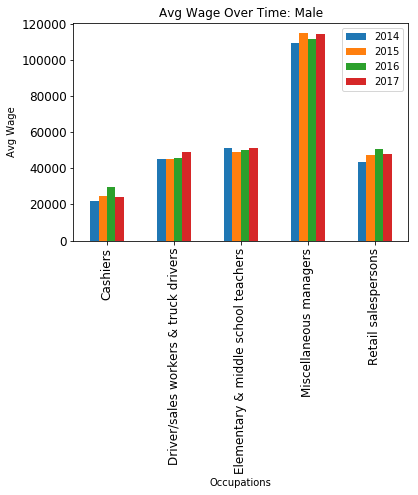

In [118]:
male_graph = male[['Average Wage','Year','Detailed Occupation']]
male_grp = male_graph.groupby(by=['Detailed Occupation','Year']).sum().unstack()
male_grp.plot(kind="bar", title="Avg Wage Over Time: Male", fontsize=12)
plt.ylabel('Avg Wage')
plt.xlabel('Occupations')
plt.legend(['2014', '2015', '2016', '2017'])